### TOPIC 8 DQ 1

After reading the assigned articles and textbook chapters, provide an example of a dataset you would like to explore using exploratory data analysis techniques. Discuss the potential research questions or hypotheses that could be addressed through this analysis, as well as the types of visualizations and statistical techniques that might be used to explore the data. Finally, provide a brief overview of how you would approach analyzing the data in Python.

Exploratory data analysis allows for us to asses what information can be extracted and how we may be able to visualize that. In many scenarios, a data scientist may find themselves working with data unfamiliar to them or in a subject they have no expertise in. Using tools like python, provide a better understanding of the dataset that can be obtained through visualizations and statistical analysis. 

Visualizations with applications like seaborn using heatmaps, histograms, etc. can help to develop hypothesis to be tested by recognizing trends in the data.

Statistical analysis like regression techniques and cluster analysis can help to support or reject the hypothesis developed. Beyond statistical analysis, python offers many packages that help to use machine learning techniques for complex problems.

For my discussion I choose a pokemon dataset from kaggle. Potential question to answer with EDA are:

Which features are correlated with each other?

What types have higher attack, defense, and speed stats?

What are the most frequent typings in each generation?

What is the most common type for legendary pokemon?

In [17]:
#import necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data to dataframe
df = pd.DataFrame(data)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
#drop column type 2
df = df.drop(['Type 2'],axis=1)
#rename Type1  to type
df = df.rename(columns={'Type 1': 'Type'})

In [5]:
#get summary statistics
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:>

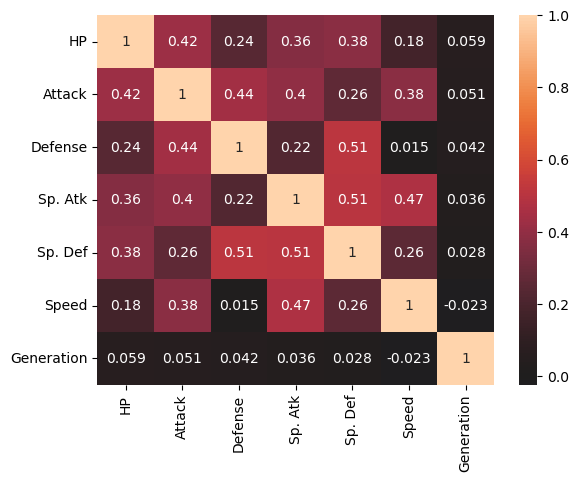

In [30]:
data=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']]
#use correlation matrix and heatmap to identify relational features
cmatrix= data.corr()
mask = np.triu(data.corr()) #allows us to only display lower triangle of heatmap
sns.heatmap(cmatrix,annot=True, center=0)

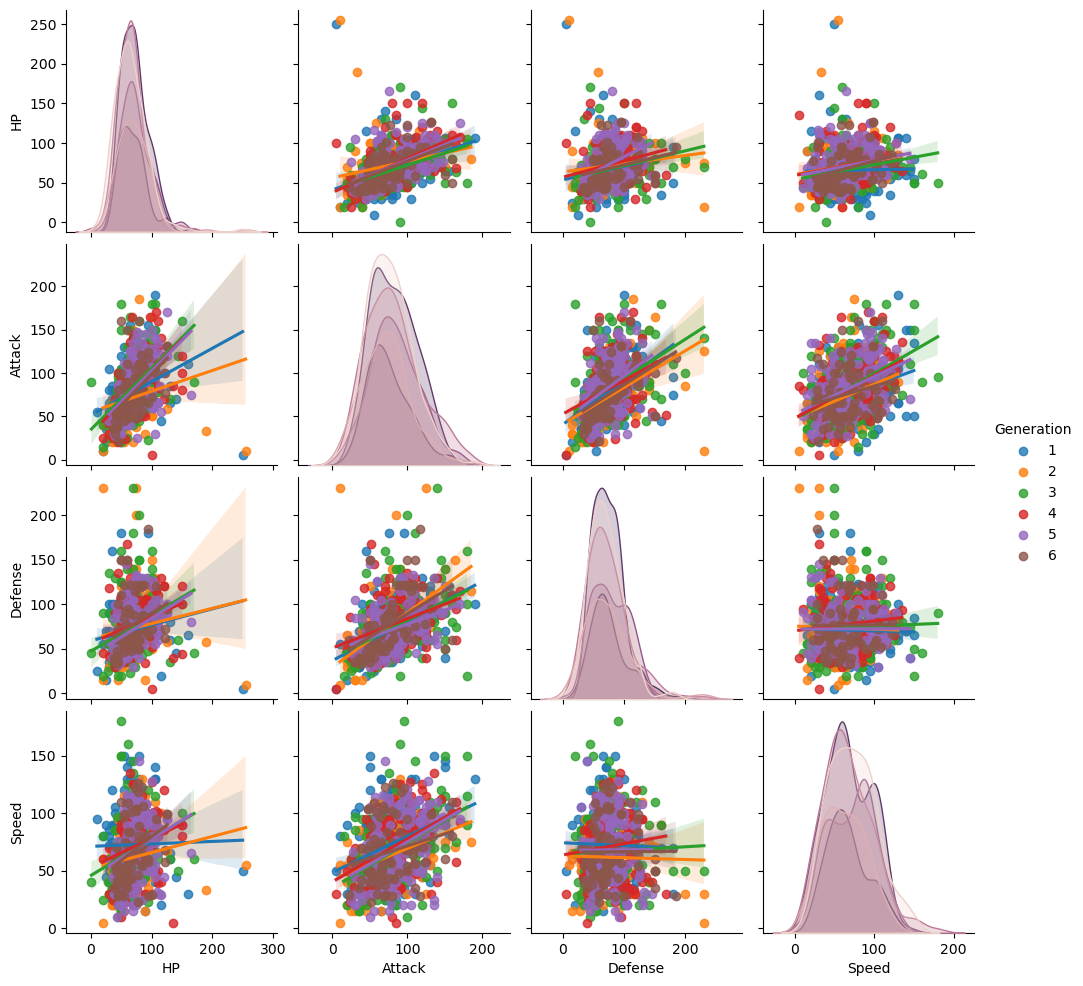

In [6]:
sns.pairplot(data = df[['HP','Attack','Defense','Speed','Generation']], diag_kind ='kde',kind='reg',hue='Generation')

In [7]:
#find unique typings
df['Type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

<AxesSubplot:xlabel='Speed', ylabel='Type'>

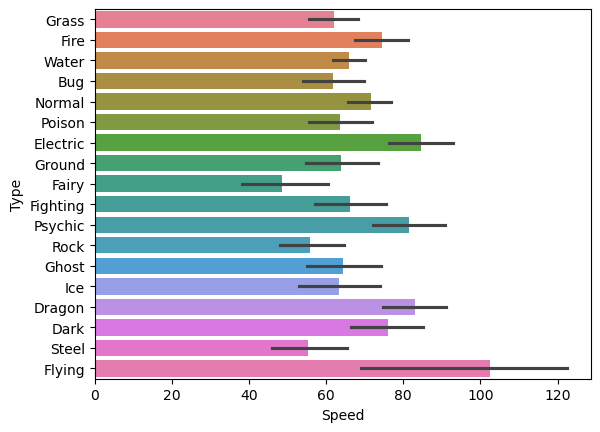

In [8]:
#investigate stats by type
sns.barplot(data=df,x='Speed', y='Type', hue ='Type')

<AxesSubplot:xlabel='Attack', ylabel='Type'>

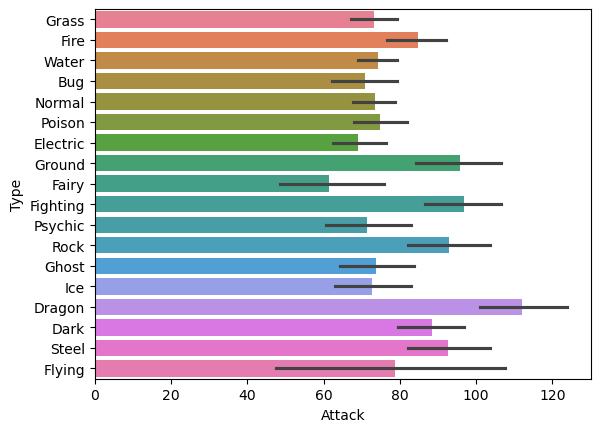

In [9]:
sns.barplot(data=df,x='Attack', y='Type', hue ='Type')

<AxesSubplot:xlabel='Defense', ylabel='Type'>

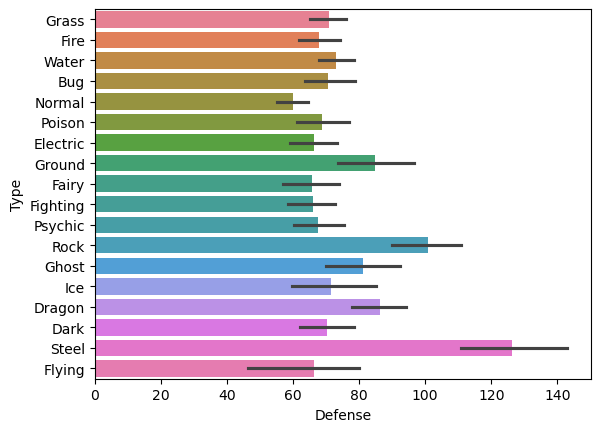

In [10]:
sns.barplot(data=df,x='Defense', y='Type', hue ='Type')

<AxesSubplot:xlabel='HP', ylabel='Type'>

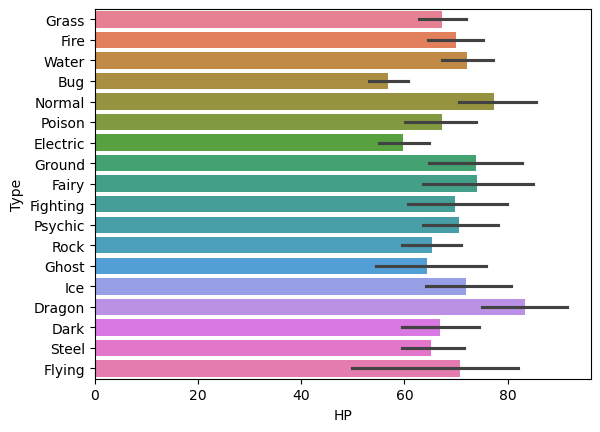

In [11]:
sns.barplot(data=df,x='HP', y='Type', hue ='Type')

In [12]:
#find out what is the most frequent type in each pokemon generation

def top_type(df):
    generations = df['Generation'].unique()
    result = {}
    for gen in generations:
        gen_pokemon = df[df['Generation'] == gen]
        type_counts = gen_pokemon['Type'].value_counts().to_dict()
        most_frequent_type = max(type_counts, key=type_counts.get)
        result[gen] = most_frequent_type
    return result

# Get the most frequent type for each generation
most_frequent_types = top_type(df)

# Print the results
for gen, type_ in most_frequent_types.items():
    print(f"Generation {gen}: Most frequent type is {type_}")

Generation 1: Most frequent type is Water
Generation 2: Most frequent type is Water
Generation 3: Most frequent type is Water
Generation 4: Most frequent type is Normal
Generation 5: Most frequent type is Normal
Generation 6: Most frequent type is Ghost


In [15]:
# Filter out only the legendary Pokémon
legendary_pokemon = df[df['Legendary'] == True]

# Count the occurrences of each legendary Pokémon
legendary_counts = legendary_pokemon['Type'].value_counts()

# Find the Pokémon with the highest occurrence count
most_common_legendary = legendary_counts.idxmax()

most_common_legendary

'Psychic'

While many of these questions seem easy to answer in a small dataset, simple questions as these become more complex as data size and features increase. EDA is an important step in laying a foundation for understanding the data one is working with.

References
Barradas, A. (2016, August 29). Pokemon with stats. Kaggle. https://www.kaggle.com/datasets/abcsds/pokemon 

Baviskar, M., Baviskar, R., Deshmukh, P., & Nagargoje, P. (n.d.). A Survey of Data Science Techniques and Available Tools.
International Research Journal of Engineering and Technology (IRJET) e. https://www.irjet.net/archive 

OpenAI. (2020). GPT-3.5. [Computer software]. Retrieved from https://openai.com
